<a href="https://colab.research.google.com/github/juanestebansoto/IA_competencia_KAGGLE/blob/main/01%20-%20exploraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import scipy
import math
import os

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = '.'

In [ ]:
!kaggle competitions download -c udea-ai4eng-20242

 79% 16.0M/20.1M [00:00<00:00, 164MB/s]
100% 20.1M/20.1M [00:00<00:00, 165MB/s]


In [ ]:
!unzip udea-ai4eng-20242

Archive:  udea-ai4eng-20242.zip
  inflating: submission_example.csv  
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


In [ ]:
df.shape

(692500, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   ID                              692500 non-null  int64 
 1   PERIODO                         692500 non-null  int64 
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object
 4   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object
 5   ESTU_HORASSEMANATRABAJA         661643 non-null  object
 6   FAMI_ESTRATOVIVIENDA            660363 non-null  object
 7   FAMI_TIENEINTERNET              665871 non-null  object
 8   FAMI_EDUCACIONPADRE             669322 non-null  object
 9   FAMI_EDUCACIONMADRE             668836 non-null  object
 10  ESTU_PAGOMATRICULAPROPIO        686002 non-null  object
 11  RENDIMIENTO_GLOBAL              692500 non-null  object
dtypes: int64(2), object(10)
memory

In [ ]:
df.describe(include=['object'])

,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
count,692500,692500,686213,661643,660363,665871,669322,668836,686002,692500
unique,948,31,8,5,7,2,12,12,2,4
top,DERECHO,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Más de 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,alto
freq,53244,282159,204048,249352,232671,592514,128289,141744,382201,175619


<ipython-input-15-99835bd7f139>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='Pastel1')


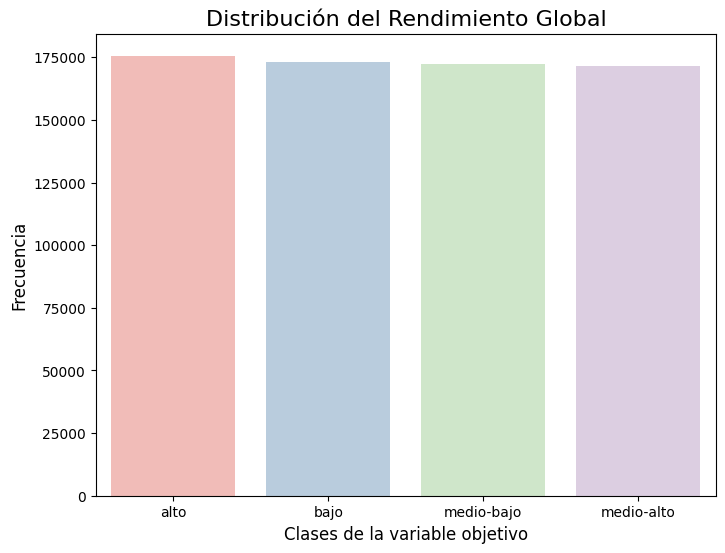

In [ ]:
class_counts = df['RENDIMIENTO_GLOBAL'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='Pastel1')

plt.title('Distribución del Rendimiento Global', fontsize=16)
plt.xlabel('Clases de la variable objetivo', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

plt.show()

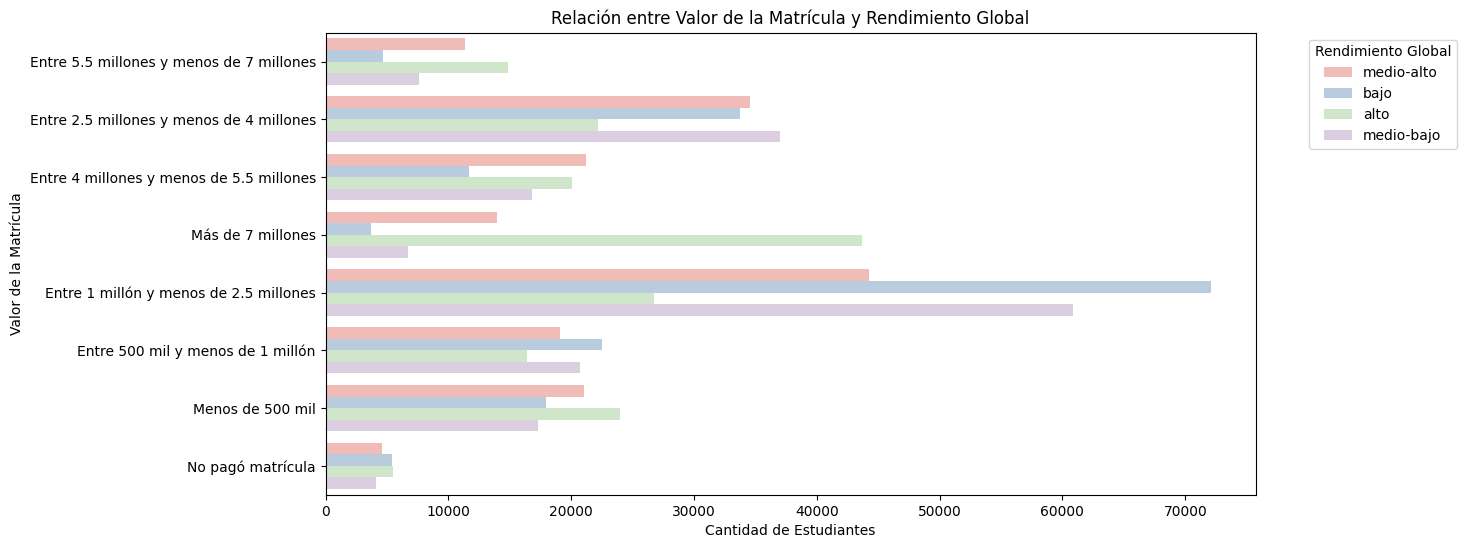

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='ESTU_VALORMATRICULAUNIVERSIDAD', hue='RENDIMIENTO_GLOBAL', palette='Pastel1')
plt.title('Relación entre Valor de la Matrícula y Rendimiento Global')
plt.ylabel('Valor de la Matrícula')
plt.xlabel('Cantidad de Estudiantes')
plt.legend(title='Rendimiento Global', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

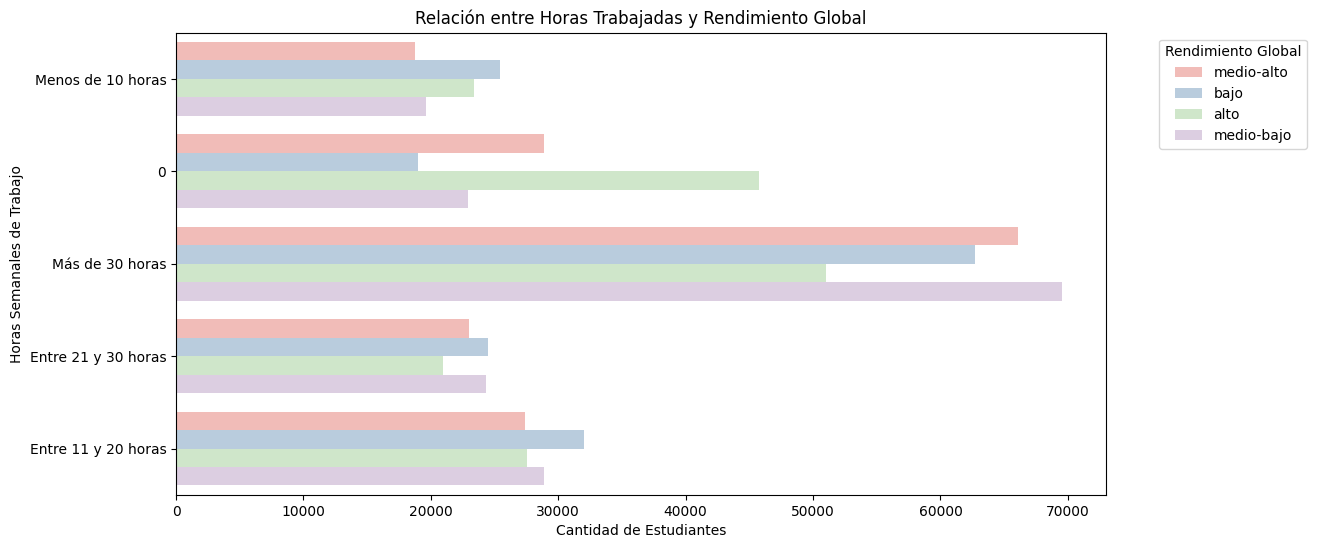

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='ESTU_HORASSEMANATRABAJA', hue='RENDIMIENTO_GLOBAL', palette='Pastel1')
plt.title('Relación entre Horas Trabajadas y Rendimiento Global')
plt.ylabel('Horas Semanales de Trabajo')
plt.xlabel('Cantidad de Estudiantes')
plt.legend(title='Rendimiento Global', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

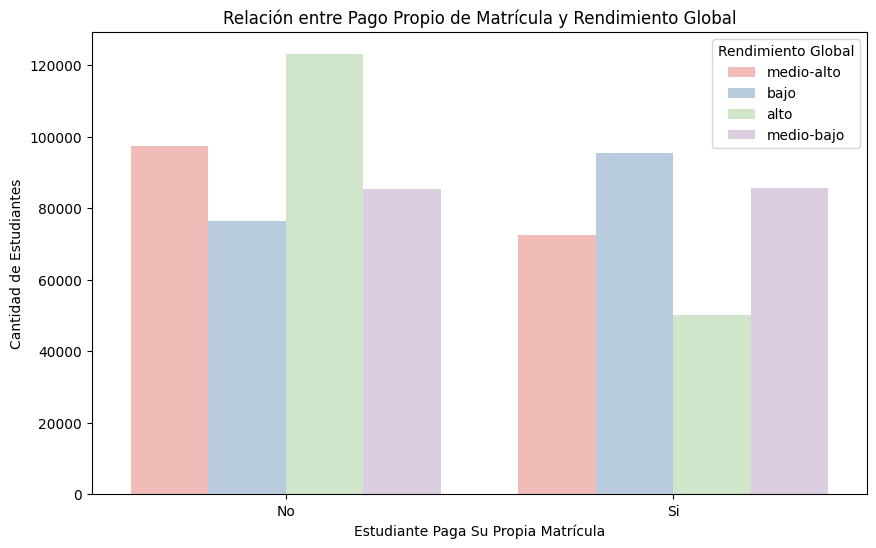

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ESTU_PAGOMATRICULAPROPIO', hue='RENDIMIENTO_GLOBAL', palette='Pastel1')
plt.title('Relación entre Pago Propio de Matrícula y Rendimiento Global')
plt.xlabel('Estudiante Paga Su Propia Matrícula')
plt.ylabel('Cantidad de Estudiantes')
plt.legend(title='Rendimiento Global')
plt.show()